# Imports/Setup

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
from sqlalchemy import create_engine
import os
from dotenv import load_dotenv
from pathlib import Path
from scipy import stats

%matplotlib inline

dotenv_path = Path('../.env')
load_dotenv(dotenv_path=dotenv_path)

conn = create_engine('postgresql://{0}:{1}@{2}:{3}/{4}'.format(os.getenv('DB_USER'),
                                                               os.getenv('DB_PASS'), 
                                                               os.getenv('DB_IP'), 
                                                               os.getenv('DB_PORT'), 
                                                               os.getenv('DB_NAME')))

# Download/Setup Data

In [3]:
dreampop_data = pd.read_sql("SELECT * FROM dreampop;", conn)
other_data = pd.read_sql("SELECT * FROM other;", conn)

In [4]:
#Combine data, drop non needed cols
data = dreampop_data.append(other_data, ignore_index=True)
data = data.drop(['index', 'type', 'uri', 'track_href', 'analysis_url'], axis=1)
data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,name,artist,genre
0,0.482,0.866,7,-4.534,1,0.0293,0.000368,0.11600,0.247,0.372,147.994,5gEni4dmBqme8fyPcyWYiK,187364,4,Kate's Not Here - Day Wave & Lawrence Rothman ...,Lawrence Rothman,dreampop
1,0.543,0.498,9,-10.152,1,0.0678,0.692000,0.43200,0.078,0.815,113.392,0l4cR2AZ18MktMd0BU3zwh,241097,4,Tenderness,Jay Som,dreampop
2,0.644,0.756,7,-8.342,1,0.0273,0.567000,0.15800,0.151,0.802,120.030,04DdNbTmZAgHfNP6FdY3Sa,264955,4,Plum,Widowspeak,dreampop
3,0.508,0.798,1,-5.412,0,0.0259,0.256000,0.20200,0.701,0.481,153.950,22gjW0ccBALzqASrryR7Dw,213481,4,Opportunity,Kevin Krauter,dreampop
4,0.562,0.724,2,-6.787,1,0.0622,0.203000,0.00115,0.129,0.464,139.997,4kDqNIQiBwkqDs6jWWcHAM,166453,4,What Does It Mean To Me?,Oberhofer,dreampop


In [5]:
#Counts per genre
data.groupby('genre').count()[['id']].sort_values(by='id', ascending=False)

,id
genre,
dreampop,11722
acoustic,100
rainy-day,100
punk-rock,100
punk,100
...,...
emo,100
world-music,100
pop-film,96


In [6]:
#Create genre ids
genres = list(data.groupby('genre').count().index)
genre_to_id = {}
id_to_genre = {}
for i, g in enumerate(genres):
    genre_to_id[g] = i
    genre_to_id[i] = g

In [7]:
#Map genres
data['genre_id'] = data['genre'].apply(lambda x: genre_to_id[x])
data['is_dreampop'] = data['genre'].apply(lambda x: True if x == 'dreampop' else False)
data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,name,artist,genre,genre_id,is_dreampop
0,0.482,0.866,7,-4.534,1,0.0293,0.000368,0.11600,0.247,0.372,147.994,5gEni4dmBqme8fyPcyWYiK,187364,4,Kate's Not Here - Day Wave & Lawrence Rothman ...,Lawrence Rothman,dreampop,28,True
1,0.543,0.498,9,-10.152,1,0.0678,0.692000,0.43200,0.078,0.815,113.392,0l4cR2AZ18MktMd0BU3zwh,241097,4,Tenderness,Jay Som,dreampop,28,True
2,0.644,0.756,7,-8.342,1,0.0273,0.567000,0.15800,0.151,0.802,120.030,04DdNbTmZAgHfNP6FdY3Sa,264955,4,Plum,Widowspeak,dreampop,28,True
3,0.508,0.798,1,-5.412,0,0.0259,0.256000,0.20200,0.701,0.481,153.950,22gjW0ccBALzqASrryR7Dw,213481,4,Opportunity,Kevin Krauter,dreampop,28,True
4,0.562,0.724,2,-6.787,1,0.0622,0.203000,0.00115,0.129,0.464,139.997,4kDqNIQiBwkqDs6jWWcHAM,166453,4,What Does It Mean To Me?,Oberhofer,dreampop,28,True


# Describe Data

In [8]:
#Unique values for categorical data
print('Genres: {0}'.format(len(data['genre_id'].unique())))
print('Keys: {0}'.format(len(data['key'].unique())))
print('Modes: {0}'.format(len(data['mode'].unique())))
print('Time Signatures: {0}'.format(len(data['time_signature'].unique())))

Genres: 127
Keys: 12
Modes: 2
Time Signatures: 5


In [9]:
#General Stats
data.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre_id
count,24248.000000,24248.000000,24248.000000,24248.000000,24248.000000,24248.000000,24248.000000,24248.000000,24248.00000,24248.000000,24248.000000,2.424800e+04,24248.000000,24248.000000
mean,0.532730,0.635415,5.252062,-8.398424,0.637166,0.065038,0.272307,0.256201,0.18924,0.444555,122.016656,2.442447e+05,3.922592,46.203151
std,0.171626,0.231139,3.554276,4.150735,0.480827,0.081795,0.313434,0.350530,0.15590,0.256213,28.589975,8.998353e+04,0.368116,31.744706
min,0.000000,0.000000,0.000000,-45.393000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,3.056000e+03,0.000000,0.000000
25%,0.417000,0.474000,2.000000,-10.269000,0.000000,0.032200,0.009505,0.000013,0.09700,0.228000,100.050750,1.960000e+05,4.000000,28.000000
50%,0.542000,0.665000,5.000000,-7.576000,1.000000,0.040600,0.121000,0.012000,0.12500,0.419000,120.601500,2.320000e+05,4.000000,28.000000
75%,0.656000,0.826000,8.000000,-5.537500,1.000000,0.062000,0.498000,0.573000,0.23300,0.641000,139.955500,2.776530e+05,4.000000,65.000000
max,0.978000,1.000000,11.000000,1.257000,1.000000,0.962000,0.996000,0.999000,0.99400,0.991000,220.040000,3.676760e+06,5.000000,126.000000


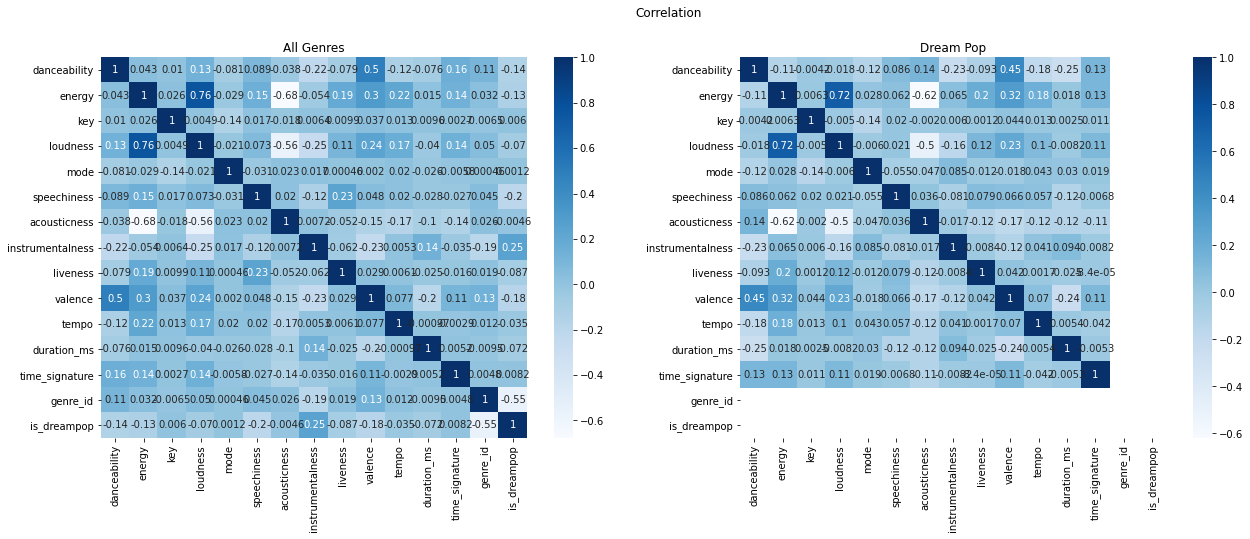

In [10]:
#Correlation
fig, axes = plt.subplots(1, 2, figsize=(21, 7))
fig.suptitle('Correlation')
axes[0].set_title('All Genres')
axes[1].set_title('Dream Pop')

corr_all = data.corr()
sns.heatmap(corr_all, cmap="Blues", annot=True, ax=axes[0])

corr_dreampop = data.loc[data['genre'] == 'dreampop'].corr()
sns.heatmap(corr_dreampop, cmap="Blues", annot=True, ax=axes[1])

plt.show()

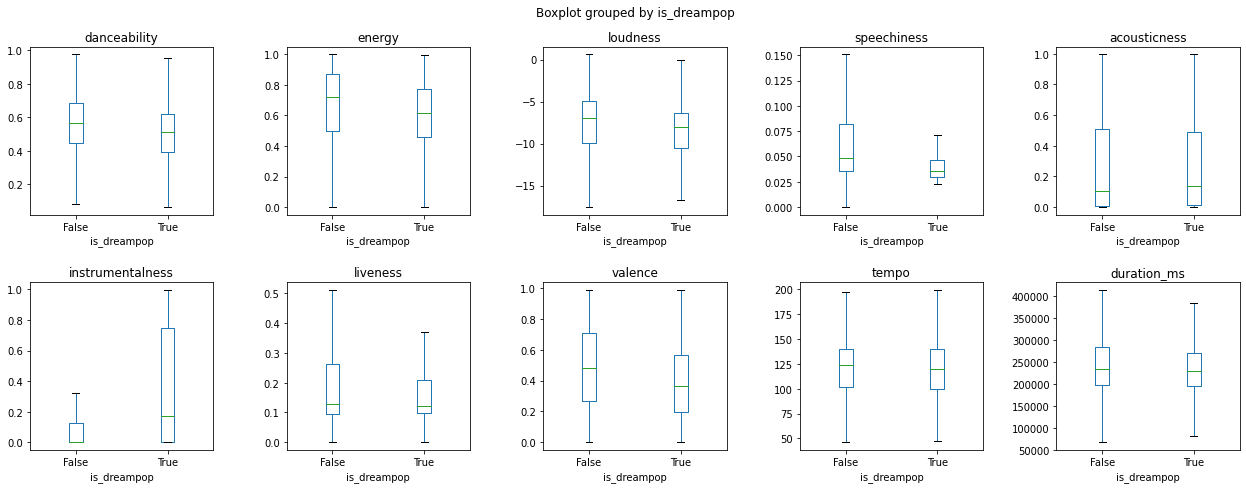

In [11]:
#Boxplots
cols = [['danceability', 'energy', 'loudness', 'speechiness', 'acousticness'], ['instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]

fig_l, axes_l = plt.subplots(2, 5, figsize=(21, 7))
for i, row in enumerate(cols):
    for j, col in enumerate(cols[i]):
        data.boxplot(by='is_dreampop', column=[col], grid=False, showfliers=False, ax=axes_l[i][j])
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

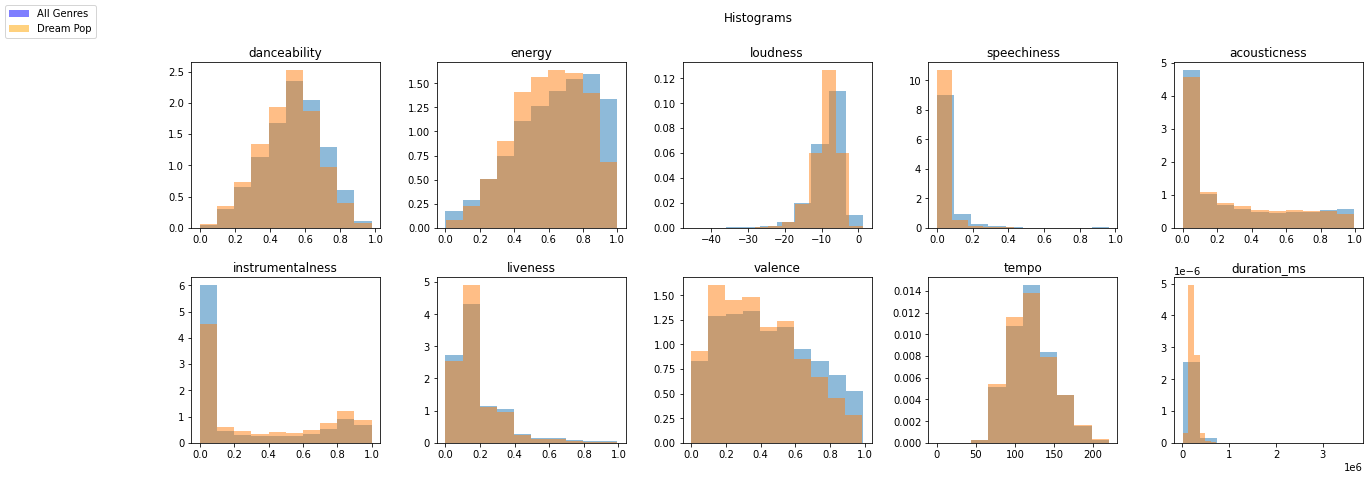

In [12]:
#Histograms
cols = [['danceability', 'energy', 'loudness', 'speechiness', 'acousticness'], ['instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]

fig_l, axes_l = plt.subplots(2, 5, figsize=(21, 7))
for i, row in enumerate(cols):
    for j, col in enumerate(cols[i]):
        data.hist(column=[col], grid=False, ax=axes_l[i][j], density=True, alpha=0.5)
        data.loc[data['is_dreampop'] == True].hist(column=[col], grid=False, ax=axes_l[i][j], density=True, alpha=0.5)

legend_elements = [Patch(facecolor='blue', label='All Genres', alpha=0.5),
                   Patch(facecolor='orange', label='Dream Pop', alpha=0.5)]
fig_l.legend(handles=legend_elements, loc='upper left')
fig_l.suptitle('Histograms')
plt.show()

# Statistical Tests

In [16]:
#KS test for each feature
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

scores = {}
for f in features:
    dp = list(data.loc[data['is_dreampop'] == True][f])
    other = list(data.loc[data['is_dreampop'] == False][f])
    scores[f] = stats.ks_2samp(dp, other).pvalue

sorted(list(scores.items()), key=lambda x: x[1])

[('speechiness', 0.0),
 ('instrumentalness', 0.0),
 ('loudness', 2.0083641646489913e-177),
 ('energy', 8.533859572051127e-164),
 ('valence', 9.16216884454433e-124),
 ('danceability', 3.366414368305323e-106),
 ('tempo', 3.31793628308942e-50),
 ('liveness', 2.6442710622742804e-25),
 ('duration_ms', 2.567840582710087e-17),
 ('acousticness', 2.5167644357500865e-11)]

In [19]:
#Mann-Whitney U test for each feature
scores = {}
for f in features:
    dp = list(data.loc[data['is_dreampop'] == True][f])
    other = list(data.loc[data['is_dreampop'] == False][f])
    scores[f] = stats.mannwhitneyu(dp, other).pvalue

sorted(list(scores.items()), key=lambda x: x[1])

[('speechiness', 0.0),
 ('instrumentalness', 0.0),
 ('valence', 1.8305366085250326e-152),
 ('energy', 2.7082519333754557e-141),
 ('loudness', 8.638631455389782e-133),
 ('danceability', 2.739512406607146e-122),
 ('duration_ms', 5.687973447399759e-16),
 ('tempo', 1.8559661739380175e-13),
 ('liveness', 5.348598827646158e-06),
 ('acousticness', 0.0004772919895414726)]

In [20]:
#T test for each feature
scores = {}
for f in features:
    dp = list(data.loc[data['is_dreampop'] == True][f])
    other = list(data.loc[data['is_dreampop'] == False][f])
    scores[f] = stats.ttest_ind(dp, other).pvalue

sorted(list(scores.items()), key=lambda x: x[1])

[('instrumentalness', 0.0),
 ('speechiness', 1.6770052604519624e-221),
 ('valence', 8.608213118632599e-167),
 ('danceability', 1.3178857976774253e-110),
 ('energy', 1.1253034663651407e-85),
 ('liveness', 8.542181613039762e-42),
 ('duration_ms', 6.750477959584803e-29),
 ('loudness', 5.122610714194488e-28),
 ('tempo', 6.243413154259742e-08),
 ('acousticness', 0.4690407856163026)]